long short_term Memory

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
start = '2012-01-01'
end = '2022-01-01'
stock = 'GOOG'
data = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [11]:
data.reset_index(inplace = True)


In [13]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2512,2021-12-27,147.533875,147.895080,146.722794,146.935530,13256000
2513,2021-12-28,145.923676,147.843277,145.413013,147.843277,18624000
2514,2021-12-29,145.979980,146.656794,144.983561,145.905252,17022000


MACD-100 days

In [16]:
ma_100_days = data.Close.rolling(100).mean()

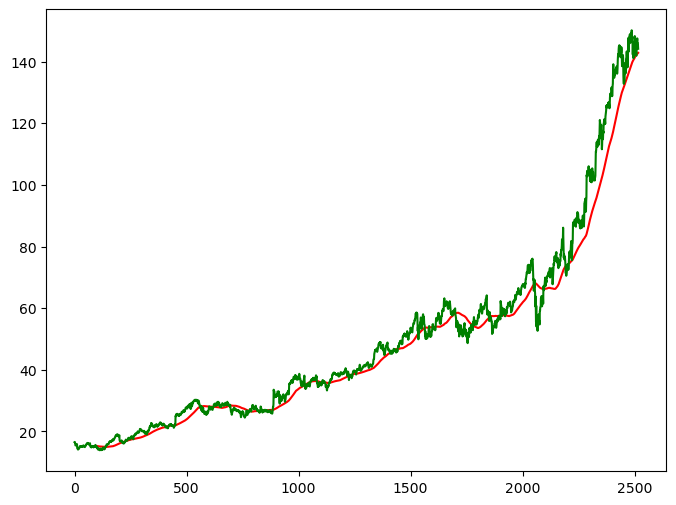

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

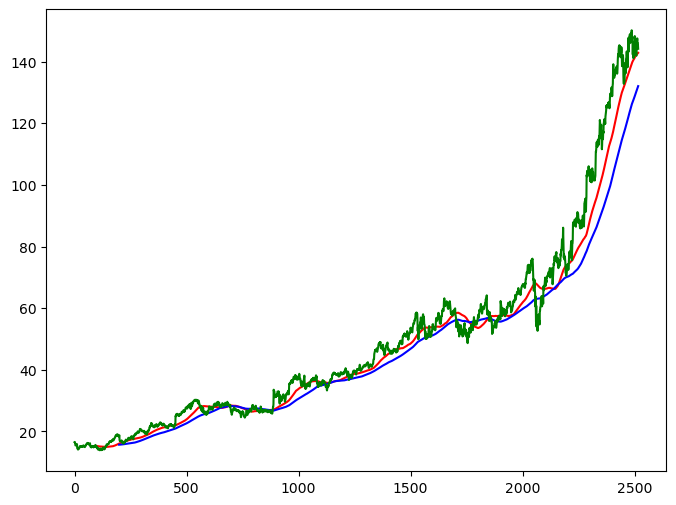

In [20]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [22]:
 data.dropna(inplace = True)

In [24]:
train_data = pd.DataFrame(data.Close[0: int(len(data) * 0.8)])
test_data = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [26]:
 train_data.shape[0]

2013

In [28]:
 test_data.shape[0]

504

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_data_scale = scaler.fit_transform(train_data)

In [ ]:
x = []
y = []

for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100 : i])
    y.append(train_data_scale[i,0])

In [35]:
x,y = np.array(x), np.array(y)

In [37]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [38]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' ,return_sequences = True,
             input_shape = ((x.shape[1],1))))
model.add(Dropout(.2))
model.add(LSTM(units = 60 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


             

C:\Users\ankit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [43]:
model.fit(x,y,epochs = 50 , batch_size = 32, verbose = 1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.0917
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0077
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - loss: 0.0079
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0068
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0078
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0055
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.0080
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0051
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0051
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0057
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0055
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0049
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0046
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0048
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - lo

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [47]:
pst_100_days = train_data.tail(100)

In [49]:
test_data = pd.concat([pst_100_days, test_data], ignore_index= True)

In [51]:
test_data_scale = scaler.fit_transform(test_data)

In [53]:
test_data_scale

array([[0.06032504],
       [0.0718496 ],
       [0.05500209],
       [0.05651928],
       [0.0618014 ],
       [0.07245243],
       [0.06440155],
       [0.06877434],
       [0.06789572],
       [0.04836119],
       [0.05735198],
       [0.05681561],
       [0.05844006],
       [0.06959175],
       [0.06716519],
       [0.05709653],
       [0.06374768],
       [0.07905754],
       [0.07576265],
       [0.07549703],
       [0.07630923],
       [0.08354783],
       [0.09074051],
       [0.09345307],
       [0.08923345],
       [0.08813517],
       [0.08980052],
       [0.09301879],
       [0.08853366],
       [0.0906281 ],
       [0.08282755],
       [0.0970085 ],
       [0.09438786],
       [0.08606122],
       [0.08295017],
       [0.07584952],
       [0.06130587],
       [0.06702723],
       [0.07784176],
       [0.07716743],
       [0.06769139],
       [0.07442425],
       [0.07767318],
       [0.08113669],
       [0.08199997],
       [0.09521543],
       [0.09553726],
       [0.100

In [55]:
x = []
y = []

for i in range(100, test_data_scale.shape[0]):
    x.append(test_data_scale[i-100 : i])
    y.append(test_data_scale[i,0])

x,y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [59]:
y_predict

array([[0.1670937 ],
       [0.16740608],
       [0.16769801],
       [0.16801094],
       [0.16839078],
       [0.1688939 ],
       [0.16957682],
       [0.17048812],
       [0.17163938],
       [0.17302215],
       [0.17463045],
       [0.1764944 ],
       [0.17864133],
       [0.18108243],
       [0.18381244],
       [0.18674833],
       [0.18971723],
       [0.1925667 ],
       [0.19519095],
       [0.1975194 ],
       [0.19947462],
       [0.20110036],
       [0.20241237],
       [0.20342448],
       [0.20420346],
       [0.2048383 ],
       [0.20548232],
       [0.20628765],
       [0.2073851 ],
       [0.20882314],
       [0.21060246],
       [0.21268082],
       [0.21500015],
       [0.21747583],
       [0.2199569 ],
       [0.22219917],
       [0.22388723],
       [0.2247559 ],
       [0.22463277],
       [0.22346582],
       [0.22131705],
       [0.21829748],
       [0.21459736],
       [0.21040425],
       [0.205894  ],
       [0.20112091],
       [0.19618772],
       [0.191

In [61]:
scale = 1/scaler.scale_

In [63]:
y_predict = y_predict * scale

In [65]:
y = y* scale

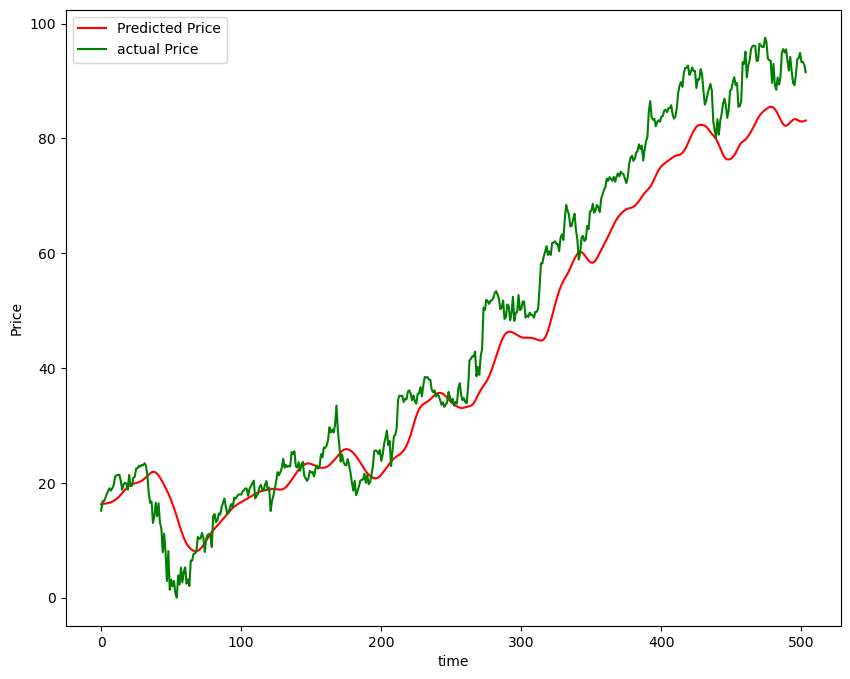

In [67]:
plt.figure(figsize=(10,8)) 
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y,'g', label = 'actual Price')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
model.save('Stock prediction Model.keras')